In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

raw_data = pd.read_csv("Covid Data.csv")
raw_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [2]:
# Data cleaning
data = raw_data.copy()

# Convert dates to datetimes
data.loc[data['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = np.nan
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], dayfirst=True)

# Fill in missing pregnancy data for males
data.loc[data["SEX"] == 2, "PREGNANT"] = 2

# Indicate missing data in binary variables, and set missing data to be 0
binary_columns = [name for name in raw_data.columns.to_list() if name not in ['AGE', 'DATE_DIED', 'CLASSIFICATION_FINAL', 'MEDICAL_UNIT']]
data[binary_columns] = data[binary_columns].replace(99, 0).replace(97, 0).astype('Int32')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,2020-05-03,0,1,65,2,2,...,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,2020-06-03,0,1,72,2,2,...,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2020-06-09,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-06-12,0,2,53,2,2,...,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2020-06-21,0,2,68,2,1,...,2,2,1,2,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,0,2,40,2,2,...,2,2,2,2,2,2,2,2,7,0
1048571,1,13,2,2,NaT,2,2,51,2,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,NaT,0,2,55,2,2,...,2,2,2,2,2,2,2,2,7,0
1048573,2,13,2,1,NaT,0,2,28,2,2,...,2,2,2,2,2,2,2,2,7,0


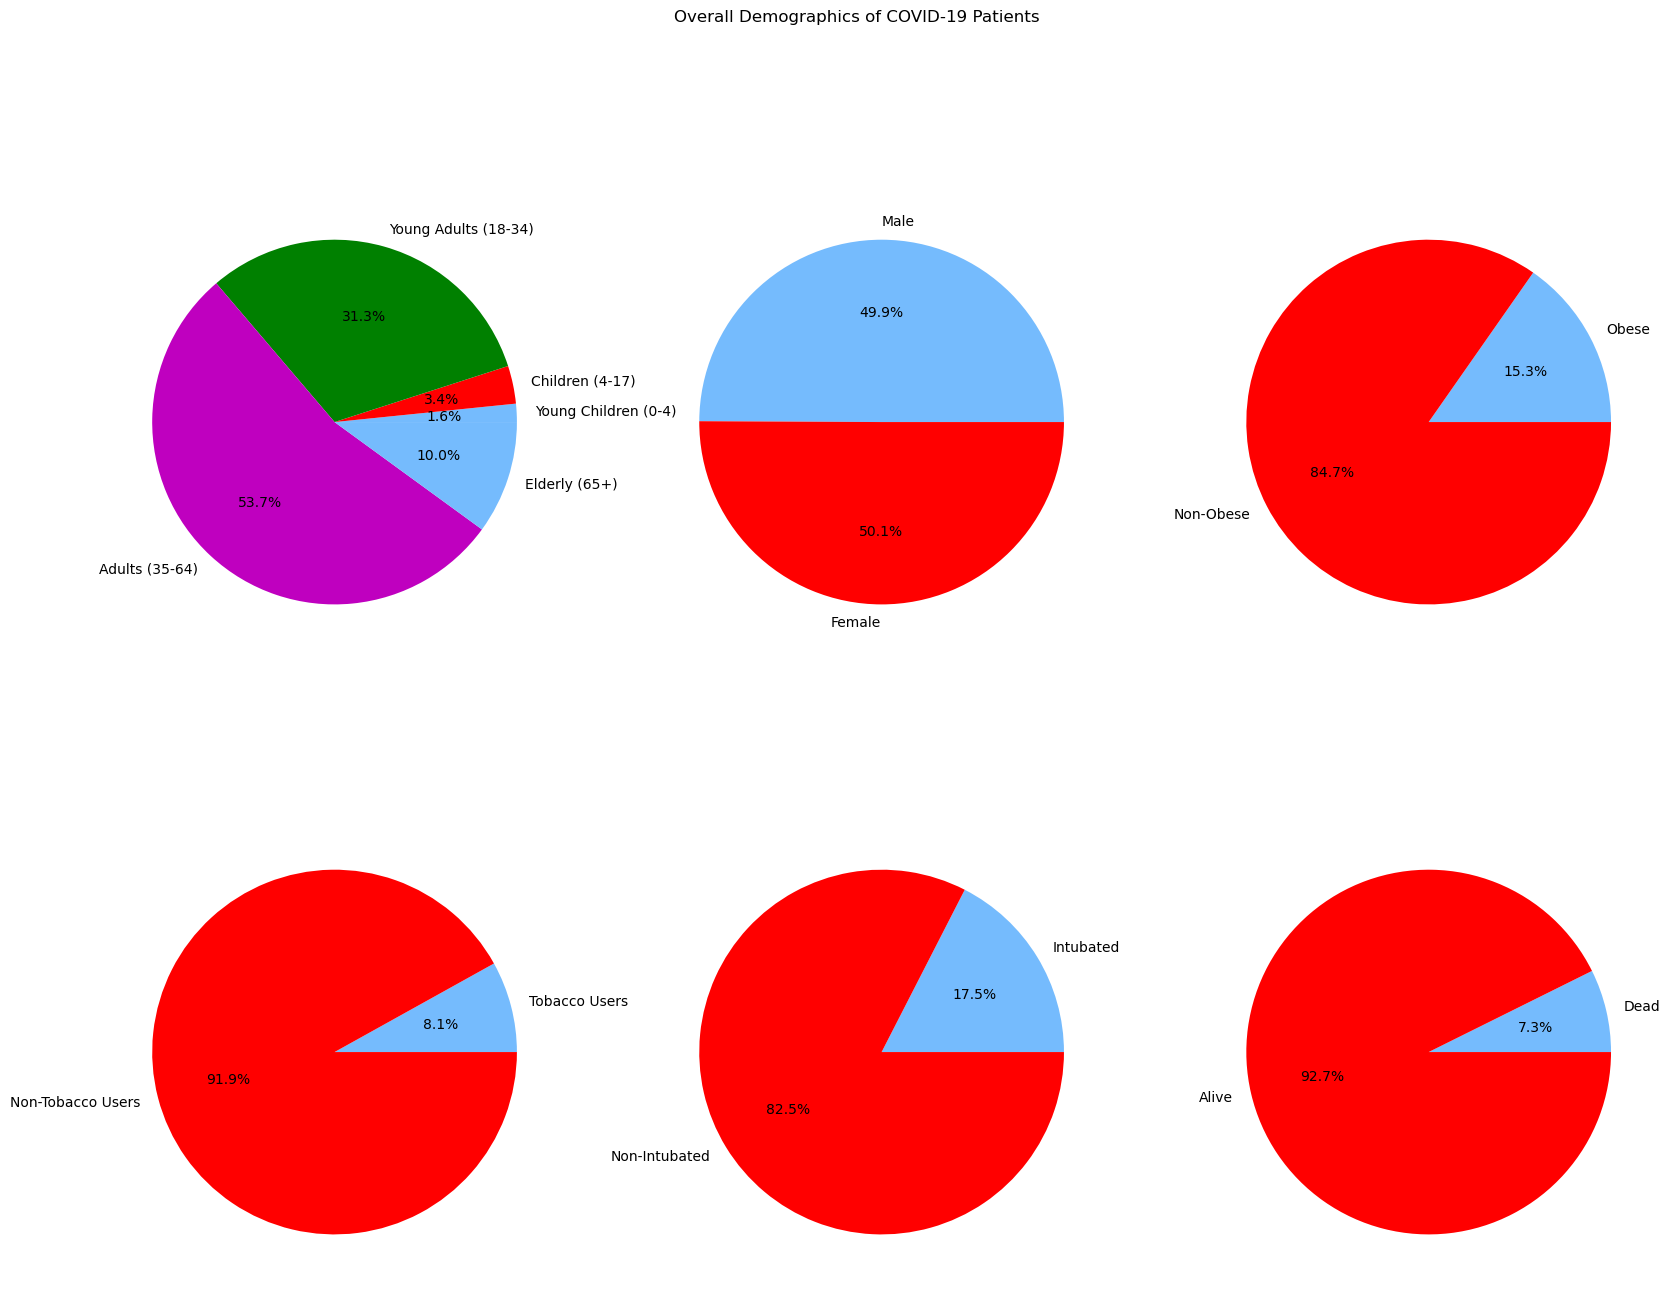

In [3]:
# Data Plots
#figure, axes = plt.subplots(len(X.columns) // 5, 5)
#figure.set_size_inches(20,30)

#axes = axes.reshape(len(X.columns)) # This treats axes as a 1D array, so we can iterate over it

#sb.stripplot(x="CLASSIFICATION_FINAL", y="AGE", data=data, jitter=True, legend=False, hue="CLASSIFICATION_FINAL", palette="Set2")
# TODO: we should probably just graph age demographics, sex, obesity, and tobacco users as a percentage of intubated patients and dead patients

young_children = data['AGE'] < 5
children = np.logical_and(18 > data['AGE'], data['AGE'] > 5)
young_adults = np.logical_and(35 > data['AGE'], data['AGE'] >= 18)
adults = np.logical_and(65 > data['AGE'], data['AGE'] >= 35)
elderly = data['AGE'] >= 65

females = data["SEX"] == 1
males = data["SEX"] == 2

obese = data["OBESITY"] == 1
non_obese = data["OBESITY"] == 2

tobacco_users = data["TOBACCO"] == 1
non_tobacco_users = data["TOBACCO"] == 2

intubated = data["INTUBED"] == 1
non_intubated = data["INTUBED"] == 2

dead = data["DATE_DIED"].notna()
alive = data["DATE_DIED"].isna()

age_groups = {
    "Young Children (0-4)": young_children,
    "Children (4-17)": children,
    "Young Adults (18-34)": young_adults,
    "Adults (35-64)": adults,
    "Elderly (65+)": elderly
}

sexes = {
    "Male": males,
    "Female": females
}

obesity = {
    "Obese": obese,
    "Non-Obese": non_obese
}

tobacco = {
    "Tobacco Users": tobacco_users,
    "Non-Tobacco Users": non_tobacco_users
}

intubation = {
    "Intubated": intubated,
    "Non-Intubated": non_intubated
}

death = {
    "Dead": dead,
    "Alive": alive
}

figure, axes = plt.subplots(2, 3, figsize=(20, 15))
ax = axes.ravel()

figure.suptitle("Overall Demographics of COVID-19 Patients")

for i, d in enumerate([age_groups, sexes, obesity, tobacco, intubation, death]):
    ax[i].pie(
        [len(data[cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

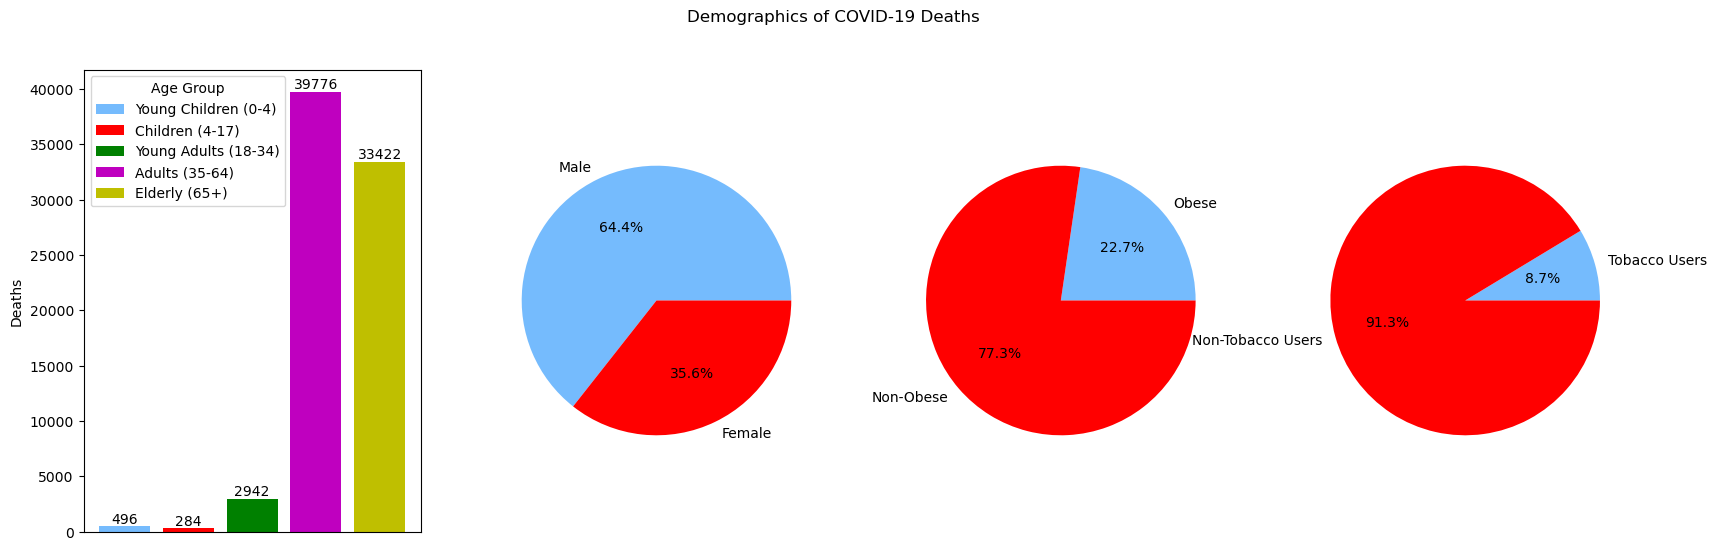

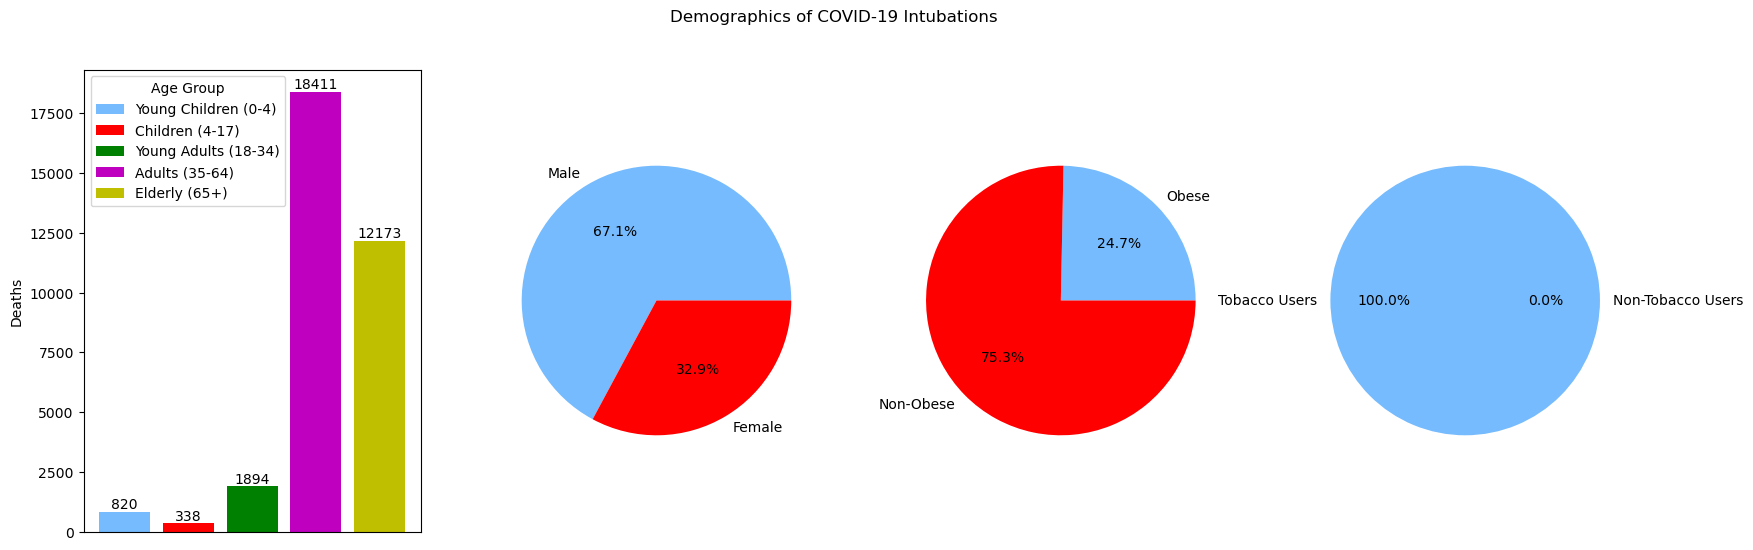

In [4]:
# Overall demographics of dead and intubated patients
figure, axes = plt.subplots(1, 4, figsize=(20, 6))
ax = axes.ravel()

figure.suptitle("Demographics of COVID-19 Deaths")

ax[0].bar(age_groups.keys(), [len(data[dead & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
ax[0].set_ylabel('Deaths')
ax[0].get_xaxis().set_ticks([])
ax[0].legend(labels=age_groups.keys(), title='Age Group')
ax[0].bar_label(ax[0].containers[0])

for i, d in enumerate([sexes, obesity, tobacco]):
    ax[1+i].pie(
        [len(data[dead & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

figure, axes = plt.subplots(1, 4, figsize=(20, 6))
ax = axes.ravel()

figure.suptitle("Demographics of COVID-19 Intubations")

ax[0].bar(age_groups.keys(), [len(data[intubated & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
ax[0].set_ylabel('Deaths')
ax[0].get_xaxis().set_ticks([])
ax[0].legend(labels=age_groups.keys(), title='Age Group')
ax[0].bar_label(ax[0].containers[0])

for i, d in enumerate([sexes, obesity, tobacco]):
    ax[1+i].pie(
        [len(data[tobacco_users & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

<Axes: >

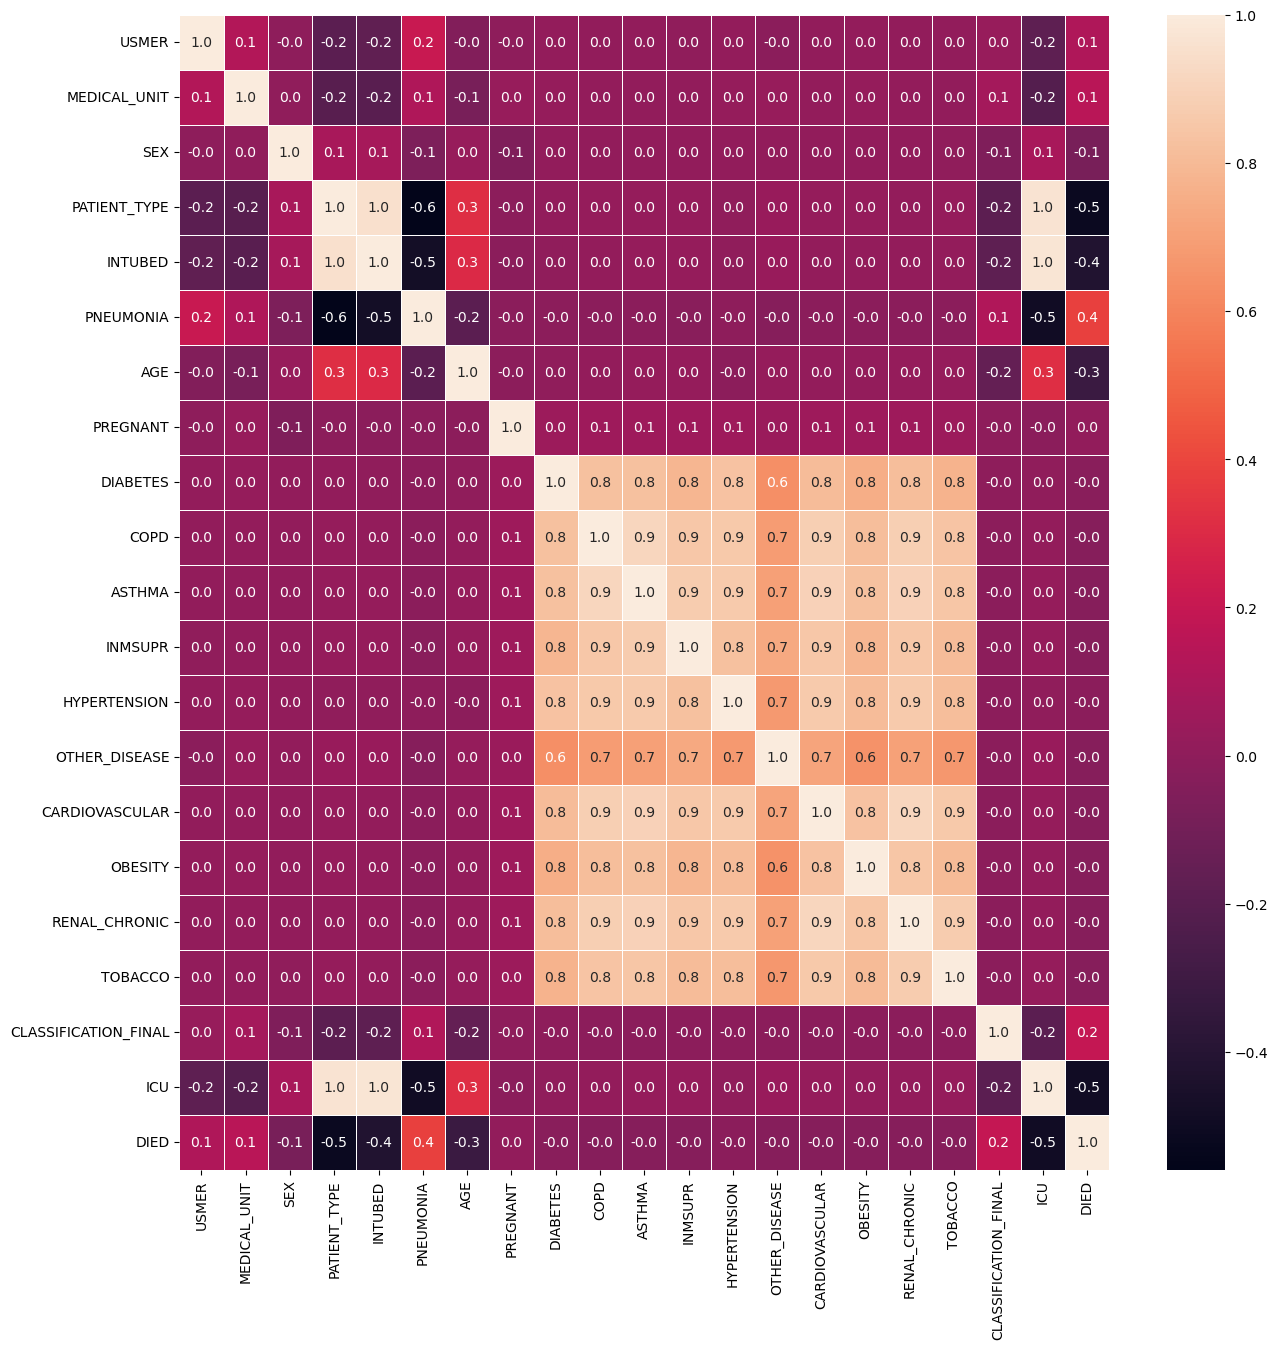

In [5]:
plt.figure(figsize=(15, 15))
correlation_matrix = pd.get_dummies(data.assign(DIED=data["DATE_DIED"].isna()).drop('DATE_DIED', axis=1).corr())
sb.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.1f')

In [6]:
data['DEATH_STATUS'] = data['DATE_DIED'].notna().astype(int)
data.drop('DATE_DIED', axis=1, inplace=True)
data.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU,DEATH_STATUS
0,2,1,1,1,0,1,65,2,2,2,...,2,1,2,2,2,2,2,3,0,1
1,2,1,2,1,0,1,72,2,2,2,...,2,1,2,2,1,1,2,5,0,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,0,2,53,2,2,2,...,2,2,2,2,2,2,2,7,0,1
4,2,1,2,1,0,2,68,2,1,2,...,2,1,2,2,2,2,2,3,0,1
5,2,1,1,2,2,1,40,2,2,2,...,2,2,2,2,2,2,2,3,2,0
6,2,1,1,1,0,2,64,2,2,2,...,2,2,2,2,2,2,2,3,0,0
7,2,1,1,1,0,1,64,2,1,2,...,1,1,2,2,2,1,2,3,0,0
8,2,1,1,2,2,2,37,2,1,2,...,2,1,2,2,1,2,2,3,2,0
9,2,1,1,2,2,2,25,2,2,2,...,2,2,2,2,2,2,2,3,2,0


In [7]:
# Every column except AGE and DATE_DIED is a binary variable, so we only need to standardize those columns
# We also need to cast the datetime columns to int64 to standardize them
# scaled_X_train = sk.preprocessing.StandardScaler().fit_transform(X_train[['AGE']].astype("int64"))
# print("Mean:", scaled_X_train.mean()) # Mean is not exactly 0 due to floating point errors
# print("Variance:", scaled_X_train.var()) # Variance is not exactly 1 due to floating point errors
# scaled_X_train

## ML

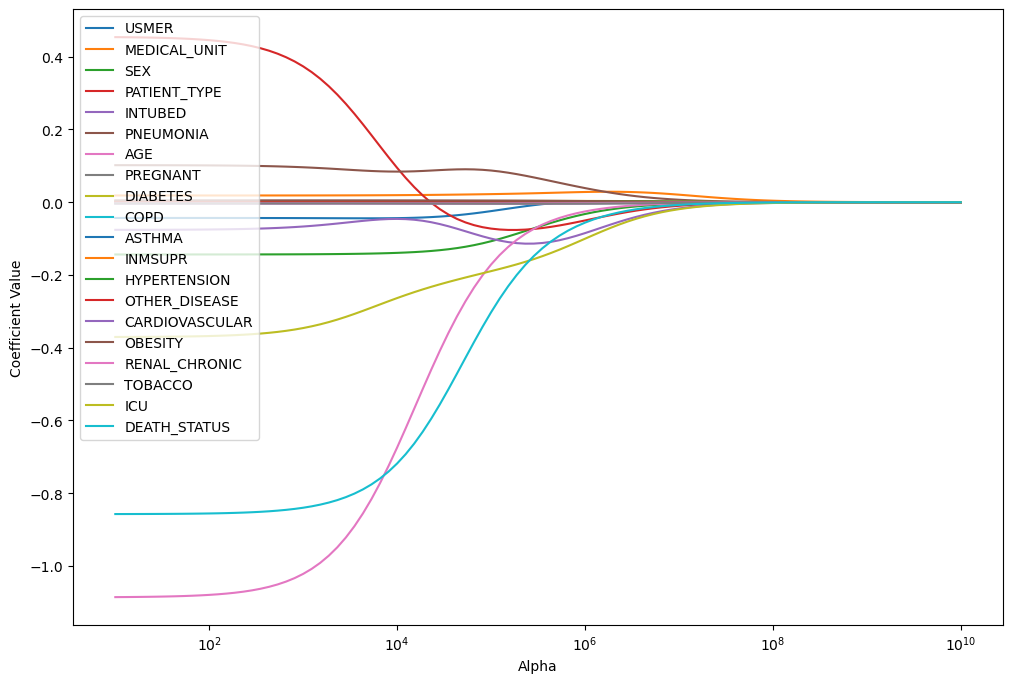

Text(0, 0.5, 'Mean Squared Error')

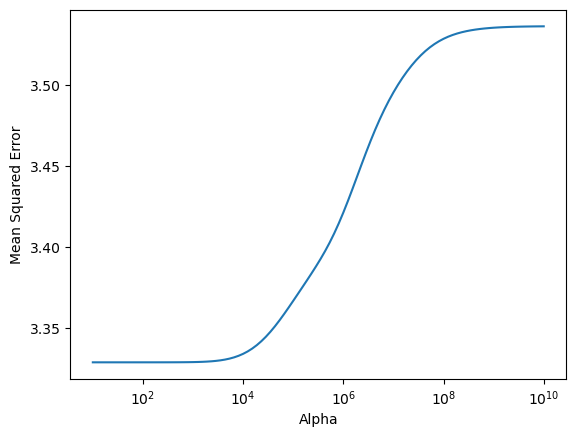

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])

y = data['CLASSIFICATION_FINAL'].copy()
X = pd.get_dummies(data.drop('CLASSIFICATION_FINAL', axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

alphas = np.logspace(1, 10, 100)
coefficients = []
mses = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    coefficients.append(ridge_model.coef_)
    mses.append(mean_squared_error(y_test, y_pred))

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.plot(alphas, coefficients)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(X.columns)
plt.show()

#mse = mean_squared_error(y_test, y_pred)
plt.plot(alphas, mses)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')

In [9]:
# Create a LASSO regression object with alpha=0.1
ridge = Ridge(alpha=1000)

# Fit the LASSO model to the training data
ridge.fit(X, y)

# Get the coefficients of the LASSO model
coefficients = ridge.coef_

# Select the features with non-zero coefficients
selected_features = [i for i, coef in enumerate(coefficients) if coef > 0.001]

# Use the selected features to train and test the classification model
X = X.iloc[:, selected_features]

In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

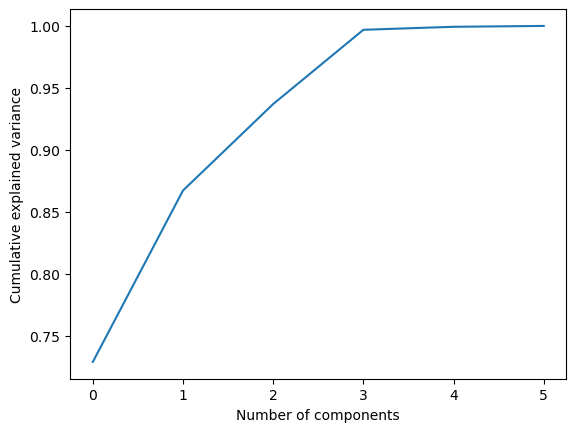

In [13]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [14]:
pca = PCA(n_components = 3)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(3)])
X_pca_df

,PC1,PC2,PC3
0,-0.433349,7.977837,-0.026909
1,-0.985286,7.979266,-0.625486
2,-1.016599,7.988631,0.747919
3,-0.434008,7.964728,-0.029523
4,-1.017448,7.966575,0.745108
...,...,...,...
1048570,-0.316281,-4.028995,0.026422
1048571,-0.315432,-4.006940,0.029233
1048572,-0.316281,-4.028995,0.026422
1048573,-0.316281,-4.028995,0.026422


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=0)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn_predictions = knn.predict(X_test)

In [17]:
print("Model Accuracy: ", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

Model Accuracy:  0.49733686193166915


C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.01      0.02      1684
           2       0.01      0.14      0.02       374
           3       0.43      0.50      0.46     76223
           4       0.00      0.00      0.00       600
           5       0.08      0.01      0.01      5183
           6       0.56      0.08      0.14     25557
           7       0.57      0.64      0.60    100094

    accuracy                           0.50    209715
   macro avg       0.24      0.20      0.18    209715
weighted avg       0.50      0.50      0.47    209715



C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

rf_predictions = rfc.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Model Accuracy:  0.5392365829816655


C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1684
           2       0.00      0.00      0.00       374
           3       0.53      0.35      0.43     76223
           4       0.00      0.00      0.00       600
           5       0.08      0.00      0.00      5183
           6       0.78      0.07      0.13     25557
           7       0.54      0.84      0.66    100094

    accuracy                           0.54    209715
   macro avg       0.28      0.18      0.17    209715
weighted avg       0.55      0.54      0.48    209715



C:\Users\zizzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# from sklearn import svm

# svm_model = svm.SVC()
# svm_model.fit(X_train,y_train)

# predictions = svm_model.predict(X_test)